------------------------------------------------------------------------------------------------------------------------------------------------------

## EVENT DISPLAY NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()

You don't have latex installed. Changing default configuration to tex=Foptionalalse


## STATIC MODE


In [3]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [26]:
INPUT_FILE = "TUTORIAL"; OV = 1; PRESET ="RAW"
info = read_input_file(INPUT_FILE)  # Read input file
channels = [0,6]

#-------------------------------- LOAD RUNS ---------------------------------#
run_keys = ["CALIB_RUNS","LIGHT_RUNS","ALPHA_RUNS","MUONS_RUNS","NOISE_RUNS"]
nruns = dict.fromkeys(run_keys)
for key in run_keys:
    try:               nruns[key] = info[key][OV] # Store runs in dictionary
    except IndexError: nruns.pop(key)
print(nruns)

runs = dict.fromkeys(nruns.keys())
for run in runs: runs[run] = load_npy(np.asarray([nruns[run]]).astype(int),np.asarray(channels).astype(int),preset=PRESET,info=info,compressed=True)
#----------------------------------------------------------------------------#

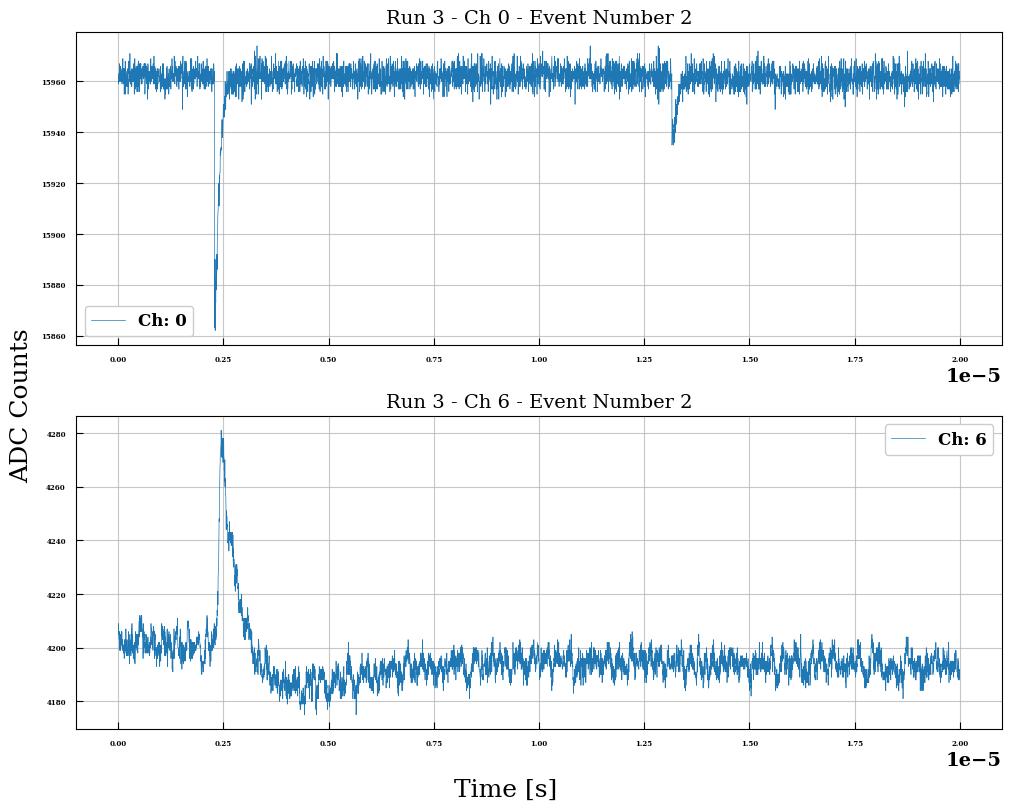

In [29]:
RUN2PLOT = "CALIB_RUNS"; EVENT2PLOT = 2

nch=len(channels); ncol=int((nch+1)/2); nrow=int((nch)/2); z=0; axs = []
if nch < 4: 
        fig, ax = plt.subplots(nch ,1, figsize = (10,8))
        axs = ax.T.flatten(); 
        if nch == 1: axs.append(ax)
        else: axs = ax
else: fig, ax = plt.subplots(dpi=200,ncols= ncol,nrows=nrow,figsize=[8,3],sharex=True)

for c,ch in enumerate(channels):
        i = int(z/ncol)
        j = z%ncol

        time = np.arange(len(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawADC"][EVENT2PLOT]))*runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["Sampling"]
        RawADC  = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawADC"][EVENT2PLOT]
        PedSTD  = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]]["RawPedSTD"][EVENT2PLOT]
        PedMean = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]]["RawPedMean"][EVENT2PLOT]
        ax[c].tick_params(axis='both', which='major', labelsize=5)
        ax[c].grid()
        ax[c].plot( time,  RawADC,linewidth=.5, label="Ch: "+str(ch))
        ax[c].plot([0, time[-1]], [PedMean,PedMean],                   color="tab:red"  ,linewidth=.7)
        ax[c].plot([0, time[-1]], [PedMean+PedSTD,PedMean+PedSTD],"--",color="tab:red"  ,linewidth=.7)
        ax[c].plot([0, time[-1]], [PedMean-PedSTD,PedMean-PedSTD],"--",color="tab:red"  ,linewidth=.7)
        ax[c].legend()  
        ax[c].set_title("Run {} - Ch {} - Event Number {}".format(runs[RUN2PLOT]["NRun"][0],ch,EVENT2PLOT),size = 14)
        ax[c].xaxis.offsetText.set_fontsize(14) # Smaller fontsize for scientific notation
        ax[c].grid(True, alpha = 0.7)

        del RawADC,PedSTD,PedMean
        z+=1;   

fig.supylabel("ADC Counts")
fig.supxlabel(r'Time [s]')
# fig.supxlabel(r'Time [$\mu$s]')

plt.show()


## INTERACTIVE MODE

In [ ]:
%run ../macros/0UVisEvent.py